In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Type it in the first cell of your notebook, then your matplotlib plots will be included next to your codes. 
# Otherwise, include plt.show()

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')
# we ignore warnings

sns.set()

In [2]:
raw_order = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_orders_dataset.csv')

raw_order_items = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_order_items_dataset.csv')

raw_customer_csv = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_customers_dataset.csv')

raw_product = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_products_dataset.csv')

raw_order_reviews = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_order_reviews_dataset.csv')


In [3]:
raw_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [4]:
raw_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


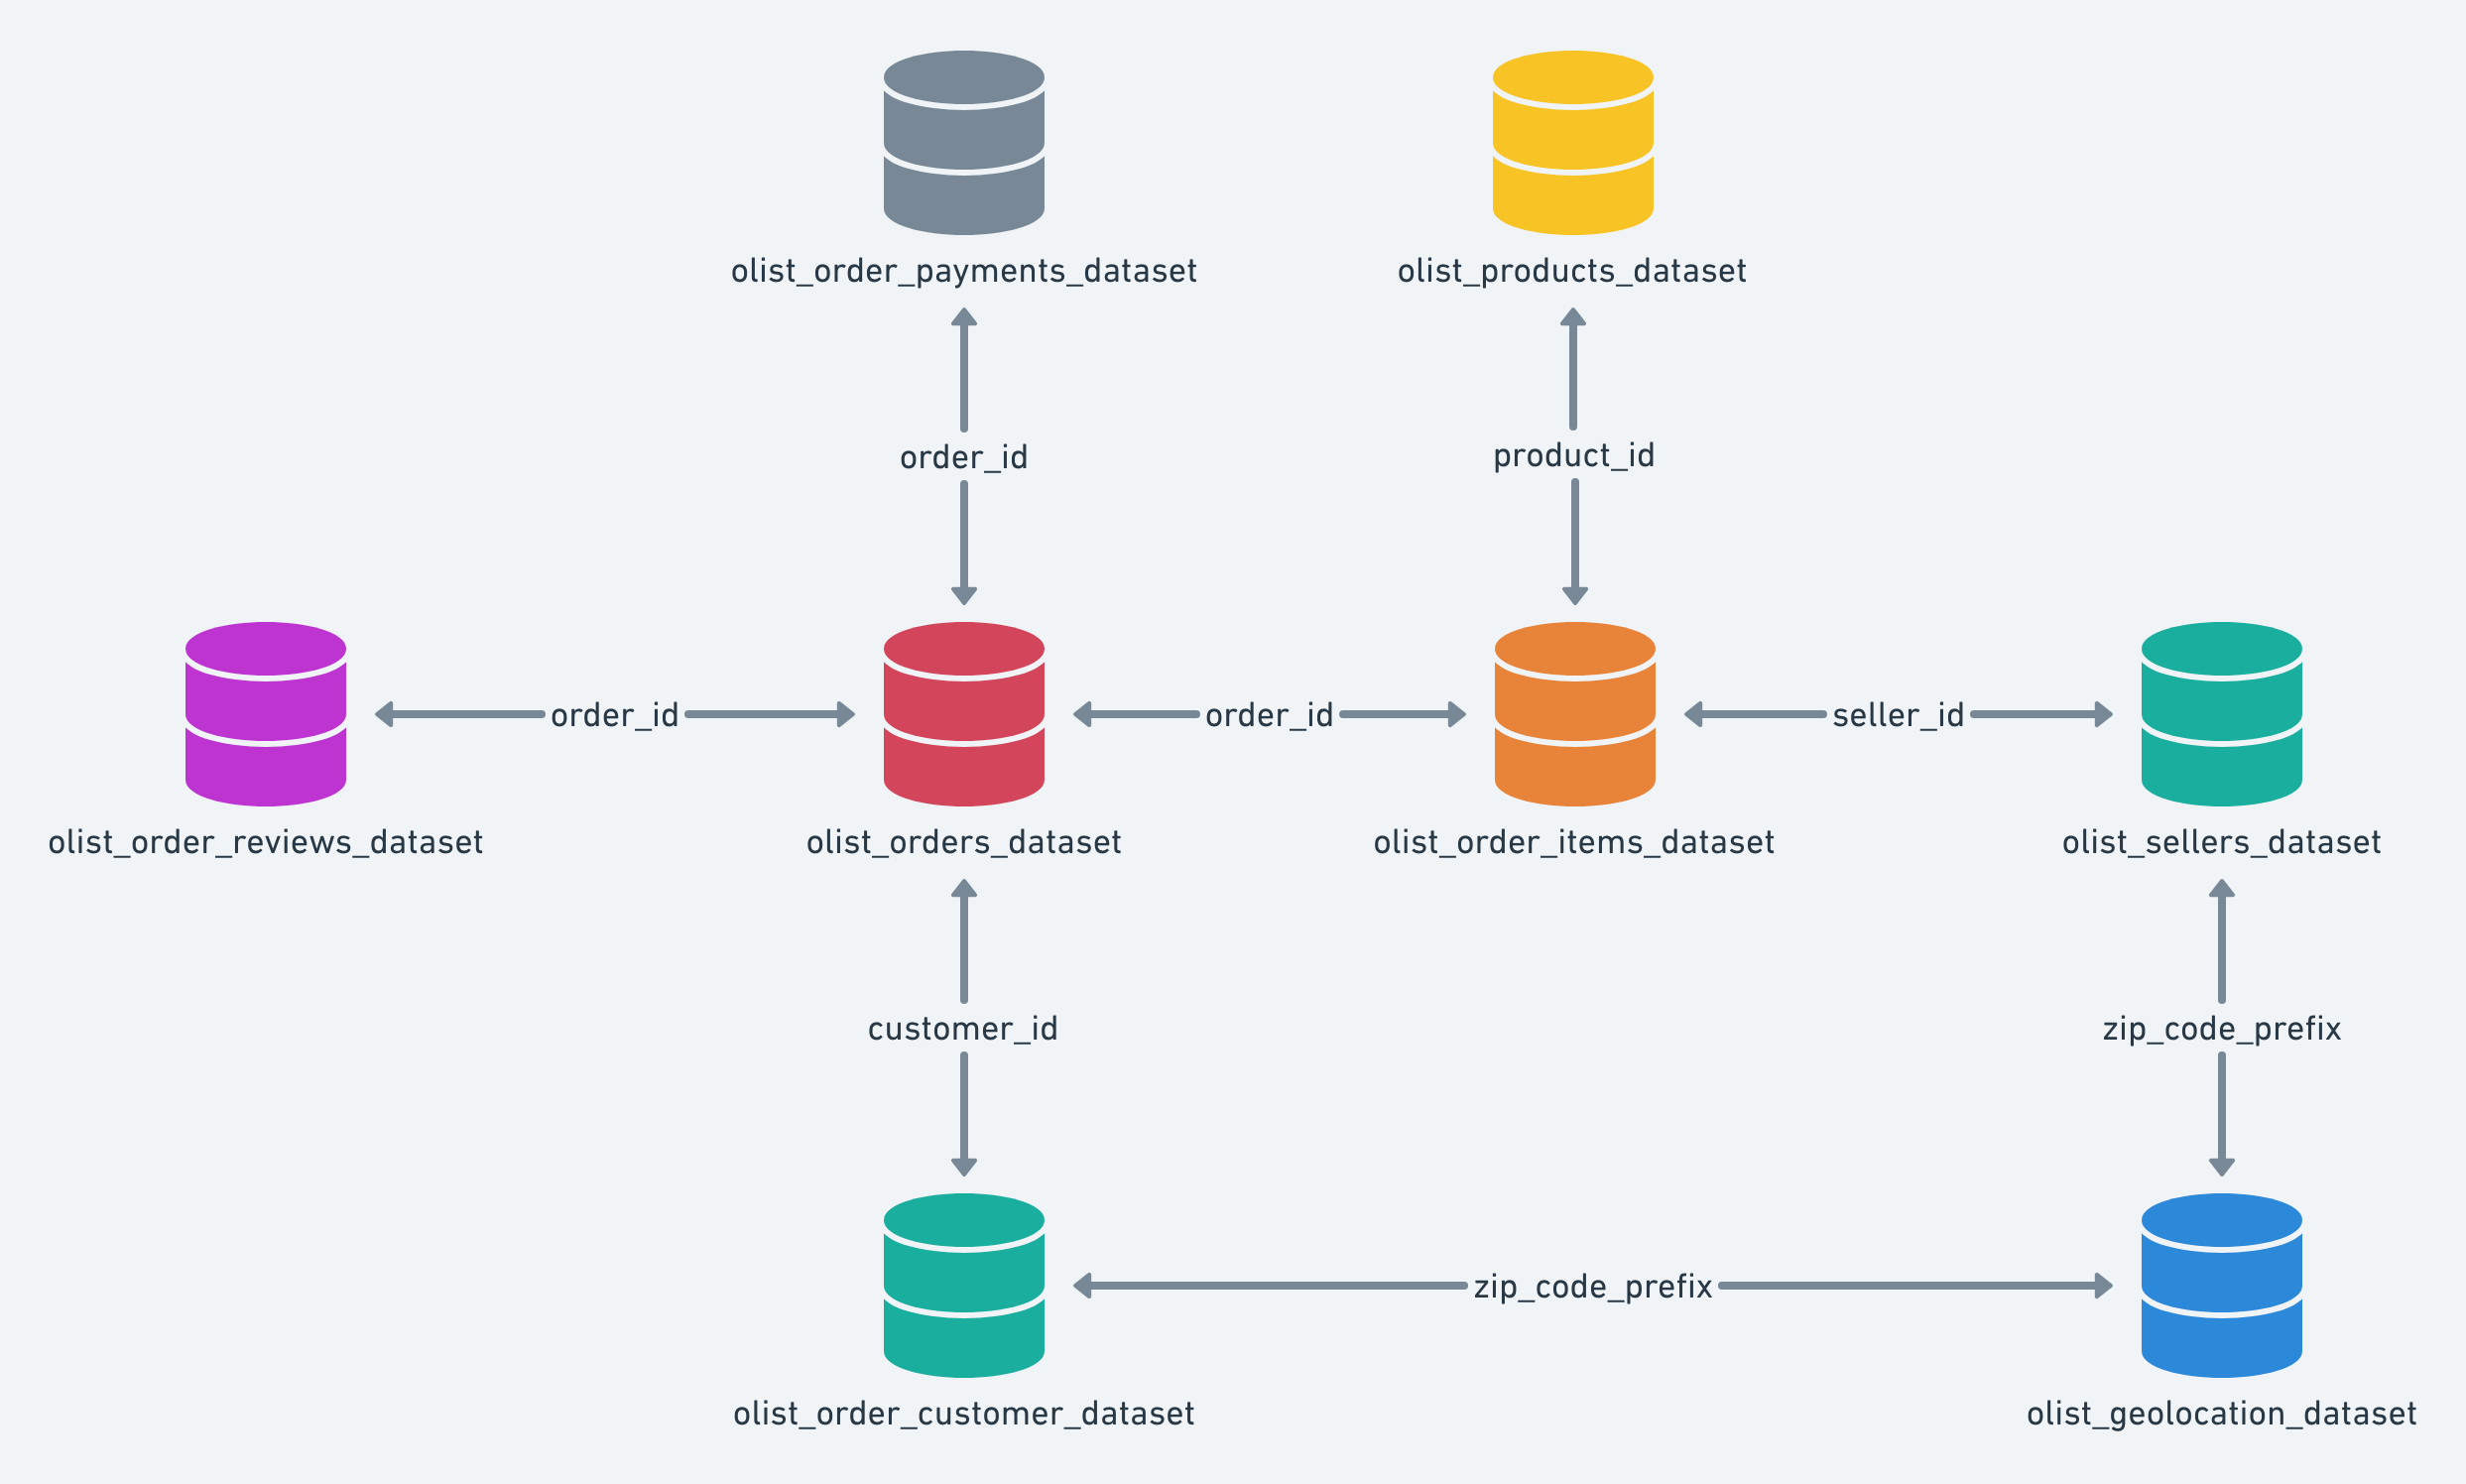

In [5]:
Image(filename = "C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/dataschema.png", width = 800, height = 200)

In [6]:
#Removing the duplicate rows 


raw_order.drop_duplicates(inplace= True)

raw_order_items.drop_duplicates(inplace= True)

raw_customer_csv.drop_duplicates(inplace= True)

raw_product.drop_duplicates(inplace= True)

In [7]:
# We want to remove unncessary columns so doing cleaning

raw_order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [8]:
raw_order_items.head(2)

raw_order_items.rename(columns={'order_item_id':'quantity'}, inplace=True)

In [9]:
raw_order_items= raw_order_items.assign(sale= lambda x: x['quantity']*x['price'])

raw_order_items.head(2)

,order_id,quantity,product_id,seller_id,shipping_limit_date,price,freight_value,sale
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9


In [10]:
raw_order_items.head(2)

,order_id,quantity,product_id,seller_id,shipping_limit_date,price,freight_value,sale
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9


In [11]:
raw_product.product_category_name.nunique()

73

In [12]:
order_customer = pd.merge(raw_order,raw_customer_csv,on=['customer_id'])

In [13]:
order_customer.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


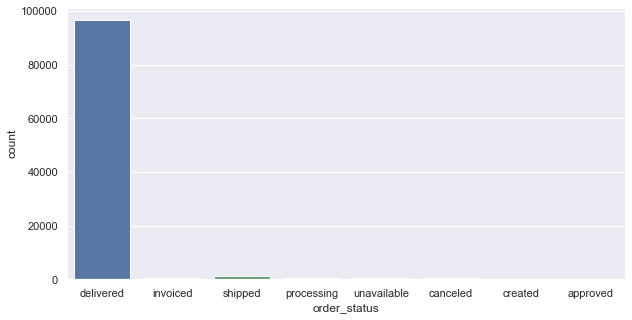

In [14]:
#EDA
plt.figure(figsize=(10,5))
sns.countplot(x='order_status', data=order_customer)
plt.show()

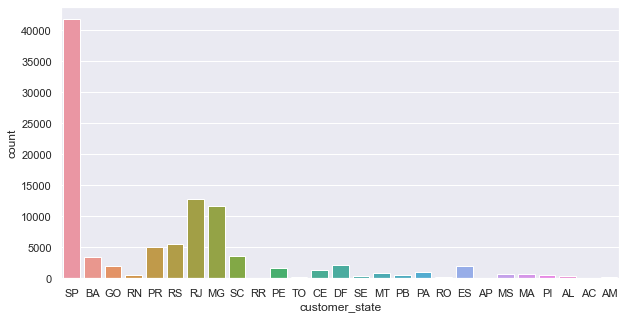

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='customer_state', data=order_customer)
plt.show()

In [16]:
order_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


In [17]:
order_items_product = pd.merge(raw_order_items,raw_product,on=['product_id'])

In [18]:
order_items_product.head(5)

,order_id,quantity,product_id,seller_id,shipping_limit_date,price,freight_value,sale,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,55.9,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,64.9,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,58.9,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,58.9,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [19]:
grouping = order_items_product.groupby(by='product_category_name').agg({'price':['sum','mean']}).droplevel(0,axis=1)

In [20]:
grouping.sort_values(by=['mean'], ascending= False).head(10)

,sum,mean
product_category_name,,
pcs,222963.13,1098.340542
portateis_casa_forno_e_cafe,47445.71,624.285658
eletrodomesticos_2,113317.74,476.124958
agro_industria_e_comercio,72530.47,342.124858
instrumentos_musicais,191498.88,281.616000
eletroportateis,190648.58,280.778468
portateis_cozinha_e_preparadores_de_alimentos,3968.53,264.568667
telefonia_fixa,59583.00,225.693182
construcao_ferramentas_seguranca,40544.52,208.992371


In [21]:
quantity_sale_product= pd.merge(order_items_product[['product_id','quantity','price','order_id','product_weight_g','product_length_cm','product_height_cm','product_width_cm']],
                           raw_product[['product_id','product_category_name']], on='product_id')

quantity_sale_product['sale']= quantity_sale_product['quantity']*quantity_sale_product['price']
quantity_sale_product.tail(7)

,product_id,quantity,price,order_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,sale
112643,fda6a1e500285956c972ec2fe10f4923,1,35.99,ffe63ac8de50ca1b8d8aba30d6bff4fb,1850.0,20.0,20.0,20.0,alimentos_bebidas,35.99
112644,801a695ff5c0c14970a71a4ceb70989e,1,146.90,ffea406a848c8afe4dec22bf6290ba00,350.0,18.0,15.0,16.0,casa_construcao,146.90
112645,4cc4d02efc8f249c13355147fb44e34d,1,129.90,ffebd80e3291e811c308365936897efd,6700.0,35.0,12.0,22.0,ferramentas_jardim,129.90
112646,b10ecf8e33aaaea419a9fa860ea80fb5,1,99.00,ffee31fb4b5e35c9123608015637c495,2300.0,37.0,30.0,20.0,moveis_decoracao,99.00
112647,dd469c03ad67e201bc2179ef077dcd48,1,736.00,fff7c4452f050315db1b3f24d9df5fcd,400.0,19.0,9.0,15.0,relogios_presentes,736.00
112648,bbe7651fef80287a816ead73f065fc4b,1,229.90,fffa82886406ccf10c7b4e35c4ff2788,2700.0,60.0,15.0,15.0,esporte_lazer,229.90
112649,350688d9dc1e75ff97be326363655e01,1,43.00,fffe41c64501cc87c801fd61db3f6244,600.0,30.0,3.0,19.0,cama_mesa_banho,43.00


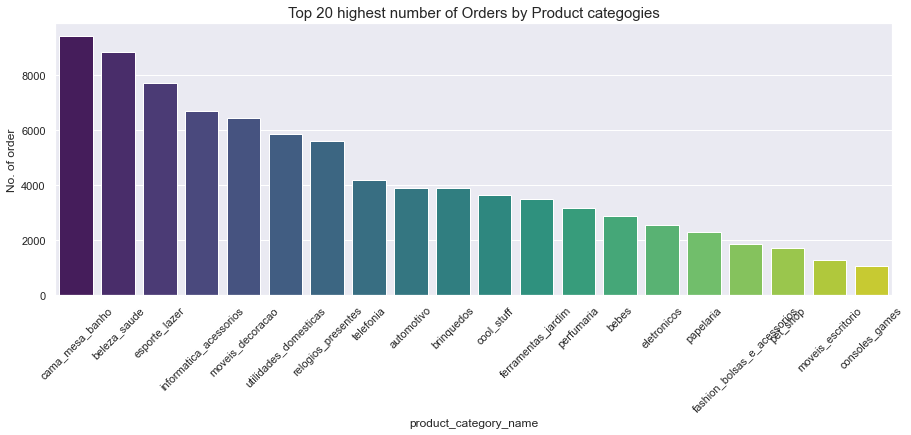

In [22]:
order_product= quantity_sale_product.groupby(by='product_category_name')['order_id'].nunique()
order_product= pd.DataFrame(order_product).sort_values('order_id', ascending=False).rename(columns={'order_id':'No. of order'})


# Visualization for Num of orders by product categories 
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name',y='No. of order', data=order_product.reset_index().head(20),
            palette='viridis',ax=ax)
ax.set_title('Top 20 highest number of Orders by Product categogies', fontsize=15)
plt.xticks(rotation = 45);

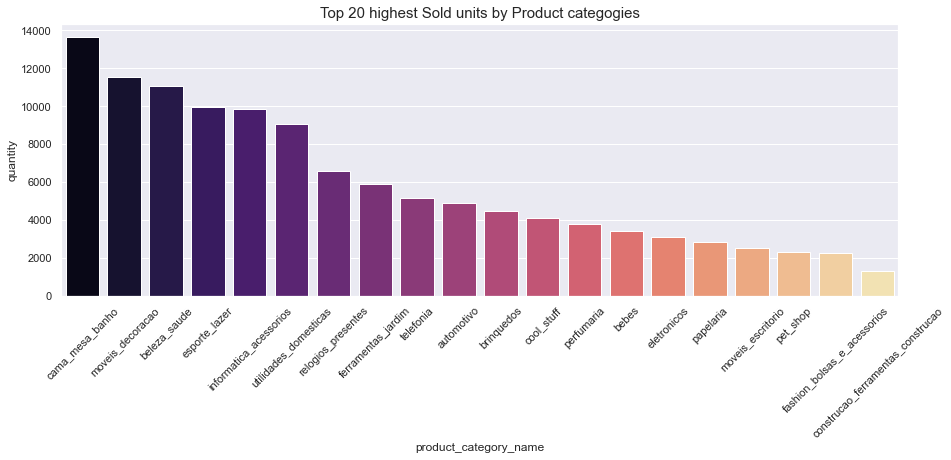

In [23]:
# Total sold units by products
quantity_product= quantity_sale_product.groupby(by='product_category_name')['quantity'].sum()
quantity_product= pd.DataFrame(quantity_product).sort_values('quantity', ascending=False)

#quantity_product.head(5)

# Visualization for Num of sold units by product categories 
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name',y='quantity', data=quantity_product.reset_index().head(20),
            palette='magma',ax=ax)
ax.set_title('Top 20 highest Sold units by Product categogies', fontsize=15)
plt.xticks(rotation = 45);

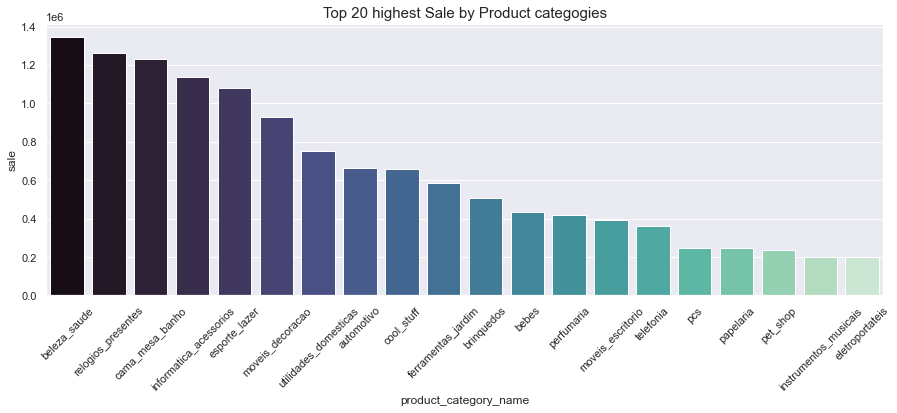

In [24]:
# Total sale by products 
sale_product= quantity_sale_product.groupby(by='product_category_name')['sale'].sum()
sale_product= pd.DataFrame(sale_product).sort_values('sale', ascending=False)

# Visualization for Num of sale by product categories 
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name',y='sale', data=sale_product.reset_index().head(20),
            palette='mako',ax=ax)
ax.set_title('Top 20 highest Sale by Product categogies', fontsize=15)
plt.xticks(rotation = 45);

In [25]:
display(order_product.head(5),quantity_product.head(5),sale_product.head(5))

,No. of order
product_category_name,
cama_mesa_banho,9417
beleza_saude,8836
esporte_lazer,7720
informatica_acessorios,6689
moveis_decoracao,6449


,quantity
product_category_name,
cama_mesa_banho,13665
moveis_decoracao,11540
beleza_saude,11081
esporte_lazer,9932
informatica_acessorios,9874


,sale
product_category_name,
beleza_saude,1347468.49
relogios_presentes,1259634.58
cama_mesa_banho,1228795.46
informatica_acessorios,1135454.64
esporte_lazer,1082435.42


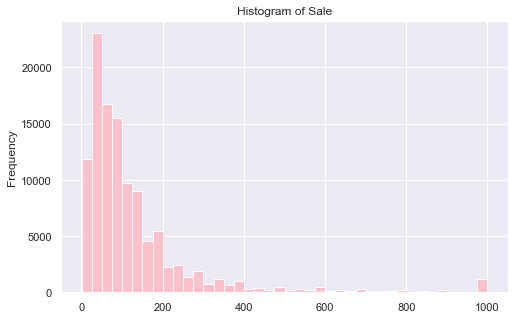

In [26]:
# Histogram of sales to see skewness 

fig, ax= plt.subplots()
ax=order_items_product['sale'].clip(upper=1000).plot.hist(bins=40, color='pink', figsize=(8,5), edgecolor='white')
ax.set_title('Histogram of Sale');

In [27]:
# Total number of sale by products
total_sale_product= order_items_product.groupby('product_id',as_index=False)['sale'].sum()
total_sale_product.head(3)

,product_id,sale
0,00066f42aeeb9f3007548bb9d3f33c38,101.65
1,00088930e925c41fd95ebfe695fd2655,129.90
2,0009406fd7479715e4bef61dd91f2462,229.00


In [28]:
product_factor_sale= pd.merge(raw_product,total_sale_product, on='product_id')
product_factor_sale.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sale
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,79.80


In [31]:
# We can find the list of all 'target' product categories that Olist should focus on 
# By finding the intersection of top categories in above 3 datasets 
n=30
target_products= list(set(order_product.head(n).index.tolist())&
                     set(quantity_product.head(n).index.tolist())&
                    set(sale_product.head(n).index.tolist()))
target_products[:5]

['eletronicos',
 'pet_shop',
 'eletroportateis',
 'moveis_decoracao',
 'construcao_ferramentas_construcao']

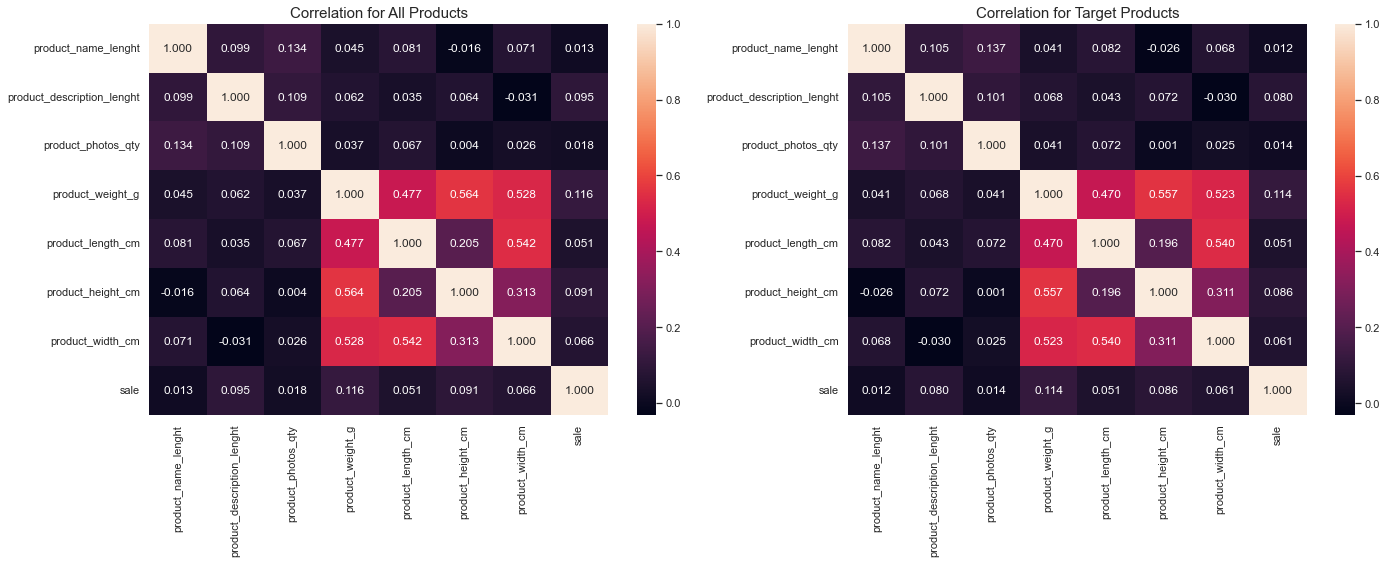

In [35]:
mask= product_factor_sale['product_category_name'].isin(target_products)
fig, ax= plt.subplots(ncols=2, figsize=(20,8))
sns.heatmap(product_factor_sale.corr(), annot=True, fmt='0.3f', ax=ax[0])
sns.heatmap(product_factor_sale[mask].corr(), annot=True, fmt='0.3f', ax=ax[1])
ax[0].set_title('Correlation for All Products', fontsize=15)
ax[1].set_title('Correlation for Target Products', fontsize=15)
fig.tight_layout();

In [36]:
product_factor_sale.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'sale'],
      dtype='object')

In [69]:
product_factor_sale['target_flag']= mask.astype(int)

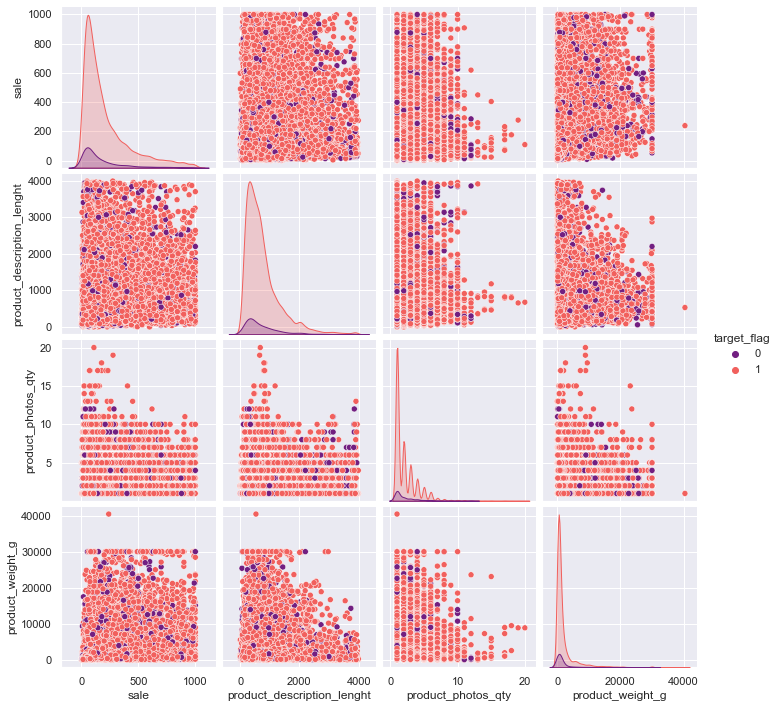

In [38]:
mask=product_factor_sale['sale']<1000
sns.pairplot(data=product_factor_sale[mask][['sale','target_flag','product_description_lenght',
                                      'product_photos_qty', 'product_weight_g']], hue='target_flag',
                                        size=2.5, palette='magma');

In [29]:
# We can wonder whether the delivery time can affect the preference of customers
# We add 2 columns which is actual and estimated delivery days (in unit of day)
# actual delivery days= order_delivered_customer_date - order_purchase_timestamp
# estimated delivery days= order_estimated_delivery_date - order_purchase_timestamp
a= pd.to_datetime(raw_order['order_purchase_timestamp'])
b= pd.to_datetime(raw_order['order_delivered_customer_date'])
c= pd.to_datetime(raw_order['order_estimated_delivery_date'])
raw_order['actual_delivery_day']= (b-a).dt.days
raw_order['estimated_delivery_day']= (c-a).dt.days
raw_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_day,estimated_delivery_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,26


In [30]:
raw_order['diff_delivery_day']= raw_order['estimated_delivery_day']-raw_order['actual_delivery_day']

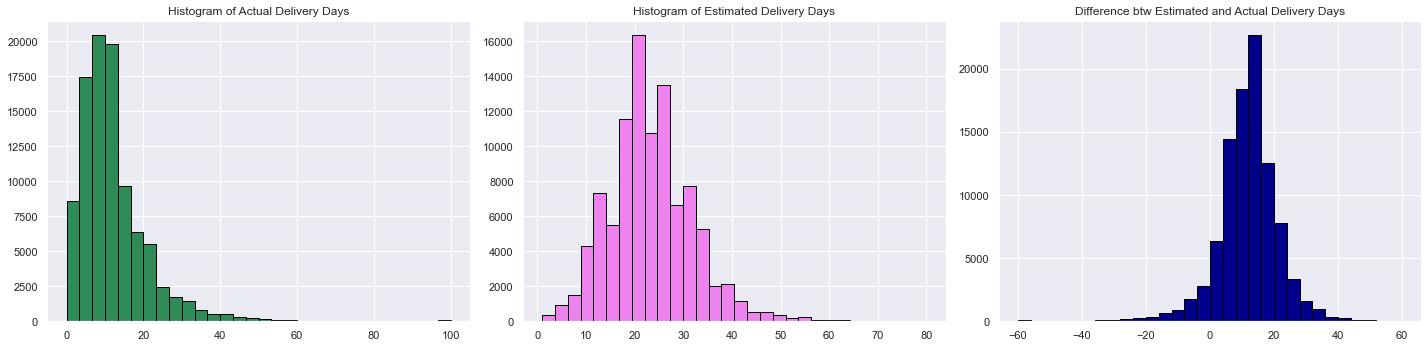

In [31]:
fig, ax= plt.subplots(ncols=3, figsize=(20,5))
ax[0].hist(raw_order['actual_delivery_day'].clip(upper=100), bins=30, color='seagreen', edgecolor='black')
ax[1].hist(raw_order['estimated_delivery_day'].clip(upper=80), bins=30, color='violet', edgecolor='black')
ax[2].hist((raw_order['estimated_delivery_day']-raw_order['actual_delivery_day']).clip(lower=-60, upper=60), 
           bins=30, color='darkblue', edgecolor='black')
ax[0].set_title('Histogram of Actual Delivery Days')
ax[1].set_title('Histogram of Estimated Delivery Days')
ax[2].set_title('Difference btw Estimated and Actual Delivery Days')
fig.tight_layout();

In [32]:
delivery_sale= pd.merge(raw_order[['order_id','actual_delivery_day','estimated_delivery_day','diff_delivery_day']],
        raw_order_items[['order_id','product_id','sale']], on='order_id')
delivery_sale.head(3)

,order_id,actual_delivery_day,estimated_delivery_day,diff_delivery_day,product_id,sale
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15,7.0,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19,6.0,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26,17.0,aa4383b373c6aca5d8797843e5594415,159.90


In [33]:
df= delivery_sale.groupby('product_id').agg({'actual_delivery_day':'mean','estimated_delivery_day':'mean',
                                             'diff_delivery_day':'mean','sale':'sum'})
df.head(3)

,actual_delivery_day,estimated_delivery_day,diff_delivery_day,sale
product_id,,,,
00066f42aeeb9f3007548bb9d3f33c38,17.0,30.0,13.0,101.65
00088930e925c41fd95ebfe695fd2655,10.0,23.0,13.0,129.90
0009406fd7479715e4bef61dd91f2462,15.0,25.0,10.0,229.00


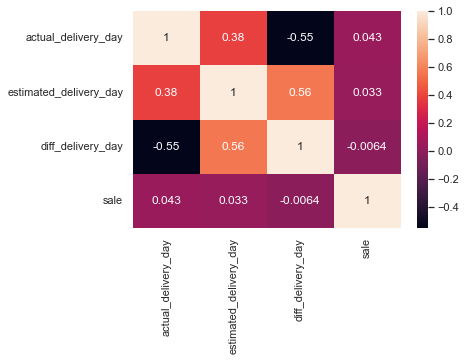

In [34]:
sns.heatmap(df.corr(), annot=True);

In [35]:
dataframe1 = pd.merge(quantity_sale_product,
                           raw_order_reviews, on='order_id')

dataframe1.head(2)

,product_id,quantity,price,order_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,sale,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,4244733e06e7ecb4970a6e2683c13e61,1,58.9,00010242fe8c5a6d1ba2dd792cb16214,650.0,28.0,9.0,14.0,cool_stuff,58.9,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,4244733e06e7ecb4970a6e2683c13e61,1,55.9,130898c0987d1801452a8ed92a670612,650.0,28.0,9.0,14.0,cool_stuff,55.9,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07


In [36]:
dataframe1.drop(['product_category_name', 'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)

dataframe1.head(2)

,product_id,quantity,price,order_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sale,review_score
0,4244733e06e7ecb4970a6e2683c13e61,1,58.9,00010242fe8c5a6d1ba2dd792cb16214,650.0,28.0,9.0,14.0,58.9,5
1,4244733e06e7ecb4970a6e2683c13e61,1,55.9,130898c0987d1801452a8ed92a670612,650.0,28.0,9.0,14.0,55.9,5


In [37]:
dataframe2 = pd.merge(dataframe1,
                           delivery_sale, on='order_id')

dataframe2.head(2)

,product_id_x,quantity,price,order_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sale_x,review_score,actual_delivery_day,estimated_delivery_day,diff_delivery_day,product_id_y,sale_y
0,4244733e06e7ecb4970a6e2683c13e61,1,58.9,00010242fe8c5a6d1ba2dd792cb16214,650.0,28.0,9.0,14.0,58.9,5,7.0,15,8.0,4244733e06e7ecb4970a6e2683c13e61,58.9
1,4244733e06e7ecb4970a6e2683c13e61,1,55.9,130898c0987d1801452a8ed92a670612,650.0,28.0,9.0,14.0,55.9,5,15.0,27,12.0,4244733e06e7ecb4970a6e2683c13e61,55.9


In [38]:
dataframe2.drop(['actual_delivery_day', 'estimated_delivery_day', 'sale_y','product_id_y'], axis=1, inplace=True)

dataframe2.head(2)

,product_id_x,quantity,price,order_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sale_x,review_score,diff_delivery_day
0,4244733e06e7ecb4970a6e2683c13e61,1,58.9,00010242fe8c5a6d1ba2dd792cb16214,650.0,28.0,9.0,14.0,58.9,5,8.0
1,4244733e06e7ecb4970a6e2683c13e61,1,55.9,130898c0987d1801452a8ed92a670612,650.0,28.0,9.0,14.0,55.9,5,12.0


In [39]:
dataframe2.drop(['product_id_x','order_id'], axis=1 ,inplace= True)

dataframe2.tail(2)

,product_id_x,order_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sale_x,review_score,diff_delivery_day
156422,bbe7651fef80287a816ead73f065fc4b,fffa82886406ccf10c7b4e35c4ff2788,2700.0,60.0,15.0,15.0,229.9,4,15.0
156423,350688d9dc1e75ff97be326363655e01,fffe41c64501cc87c801fd61db3f6244,600.0,30.0,3.0,19.0,43.0,5,13.0


## Multiple Algorithms are run ;  R2, MSE, MAE, RMSE are displayed for each

In [83]:
#pip install pycaret
from pycaret.regression import *

In [87]:
reg_experiment = setup(dataframe2, 
                       target = 'sale_x', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ML Project_ Spring 2022')

,Description,Value
0,session_id,123
1,Target,sale_x
2,Original Data,"(156424, 7)"
3,Missing Values,1
4,Numeric Features,5
5,Categorical Features,1
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(109496, 10)"


2022/04/19 00:56:50 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [88]:
best_model = compare_models(exclude=['xgboost'], fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,64.4361,29376.0804,171.0801,0.6542,0.5953,0.6252,1.6840
rf,Random Forest Regressor,67.8305,30440.8455,174.2558,0.6402,0.6080,0.6803,2.4540
knn,K Neighbors Regressor,79.8123,40870.0883,201.7585,0.5155,0.6953,0.7982,0.1340
lightgbm,Light Gradient Boosting Machine,94.5449,41461.3294,203.4765,0.5102,0.8357,1.1460,0.2140
dt,Decision Tree Regressor,71.0859,42477.9172,205.9918,0.4960,0.6654,0.6609,0.1000
ada,AdaBoost Regressor,128.4631,59953.6665,244.7383,0.2884,1.0522,1.8477,0.2740
gbr,Gradient Boosting Regressor,109.2451,67720.4887,259.6073,0.2099,0.9127,1.3269,1.2280
lar,Least Angle Regression,117.4395,79747.5514,281.6534,0.0704,1.0092,1.6314,0.0320
br,Bayesian Ridge,117.4267,79747.6014,281.6533,0.0704,1.0092,1.6313,0.0460
ridge,Ridge Regression,117.4394,79747.5453,281.6533,0.0704,1.0092,1.6314,0.5160


In [105]:
# Specifically for SVM 

catboost = create_model('svm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,95.6418,67920.2147,260.6151,0.0140,0.8603,0.7773
1,97.6376,59741.8647,244.4215,0.0128,0.8727,0.7817
2,103.2605,90509.9517,300.8487,0.0072,0.8810,0.7771
3,99.2014,78381.8176,279.9675,0.0105,0.8710,0.7757
4,103.0202,96937.6060,311.3480,0.0082,0.8806,0.7804
5,102.7804,100693.5125,317.3224,0.0074,0.8797,0.7890
6,95.4520,88282.8010,297.1242,0.0075,0.8537,0.7496
7,103.3478,86112.2567,293.4489,0.0034,0.8834,0.7701
8,102.5607,104270.2331,322.9090,0.0047,0.8810,0.7814


## Time Series Forecasting | LSTM | AREMA

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

from datetime import datetime

import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': '--'})

import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [45]:
mql = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_marketing_qualified_leads_dataset.csv')
mql.head(10)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
5,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search
6,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email
7,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email
8,2f838cade4a6012a6cb1016d1d8d95ed,2017-11-10,aeac92c0f5ae22a04ed3b746cce3a1b6,organic_search
9,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social


In [47]:
# closed deals dataset
closed_deals = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_closed_deals_dataset.csv')
closed_deals.head(5)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [48]:
# marketing funnel dataset (NaNs are leads that did not close a deal)
mf = mql.merge(closed_deals, on='mql_id', how='left')
mf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         8000 non-null   object 
 1   first_contact_date             8000 non-null   object 
 2   landing_page_id                8000 non-null   object 
 3   origin                         7940 non-null   object 
 4   seller_id                      842 non-null    object 
 5   sdr_id                         842 non-null    object 
 6   sr_id                          842 non-null    object 
 7   won_date                       842 non-null    object 
 8   business_segment               841 non-null    object 
 9   lead_type                      836 non-null    object 
 10  lead_behaviour_profile         665 non-null    object 
 11  has_company                    63 non-null     object 
 12  has_gtin                       64 non-null     o

In [49]:
# sellers dataset
sellers = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_sellers_dataset.csv')
sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [50]:
# marketing funnel merged with sellers (this way you get seller location)
mf_sellers = mf.merge(sellers, on='seller_id', how='left')
mf_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         8000 non-null   object 
 1   first_contact_date             8000 non-null   object 
 2   landing_page_id                8000 non-null   object 
 3   origin                         7940 non-null   object 
 4   seller_id                      842 non-null    object 
 5   sdr_id                         842 non-null    object 
 6   sr_id                          842 non-null    object 
 7   won_date                       842 non-null    object 
 8   business_segment               841 non-null    object 
 9   lead_type                      836 non-null    object 
 10  lead_behaviour_profile         665 non-null    object 
 11  has_company                    63 non-null     object 
 12  has_gtin                       64 non-null     o

In [52]:
# order items dataset
items = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_order_items_dataset.csv')
items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [53]:
# marketing funnel merged with items (this way you get products sold by sellers)
mf_items = mf.merge(items, on='seller_id', how='left')
mf_items.head(5)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,reseller,NaN,0.0,1efcc6ba75b519535a510c53153a9256,1.0,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76


In [56]:
df_customer=pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_customers_dataset.csv')
df_orders=pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_orders_dataset.csv')
df_payments= pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_order_payments_dataset.csv')

In [57]:
## getting order id by customer purchases 

df_customer_order=pd.merge(df_customer,df_orders[['order_id','customer_id','order_purchase_timestamp']],on='customer_id')

In [58]:
## payments in same order id are combined to get total spending on an order

paid=df_payments[['order_id','payment_value']].groupby('order_id').sum().reset_index()

In [59]:
# now the total payment by each order is merged to the cutomer who has bought it to find the total amount purchase


df_customer_order_rev=pd.merge(df_customer_order,paid,on='order_id')

In [60]:
# unwanted columns are dropped

df_customer_order_rev.drop(['customer_zip_code_prefix','customer_city','customer_state'],axis=1,inplace=True)

In [61]:
df_customer_order_rev['order_purchase_timestamp']=pd.to_datetime(df_customer_order_rev['order_purchase_timestamp']).dt.date

In [62]:
# find the last date on which customer made the purchase

recency=pd.DataFrame(df_customer_order_rev.groupby('customer_unique_id')['order_purchase_timestamp'].max())

In [63]:
# we take the maximum date of purchase made by customers as the date to calculate the recency of the purchase

recency['recent_days']=recency['order_purchase_timestamp'].max()-recency['order_purchase_timestamp']
recency['recent_days']=recency['recent_days'].dt.days

In [64]:
# the number of times a unique customer has made purchase

frequency=pd.DataFrame(df_customer_order_rev.groupby('customer_unique_id')['customer_id'].count())

In [65]:
monetary=pd.DataFrame(df_customer_order_rev[['customer_unique_id','payment_value']].groupby('customer_unique_id')['payment_value'].sum())

In [66]:
df_rfm=pd.merge(recency,frequency,on='customer_unique_id')
df_rfm=pd.merge(df_rfm,monetary,on='customer_unique_id')

In [67]:
# Freqency - Number of purchase made
## Recency- Days from last purchase
## Monetary-- total amount purchase for by a customer


df_rfm.drop(['order_purchase_timestamp'],axis=1,inplace=True)
df_rfm.reset_index(inplace=True)
df_rfm.columns=['Cust_unique_Id','Recency','Frequency','Monetary']
#use CustomerID as index
df_rfm.set_index('Cust_unique_Id',inplace=True)
df_rfm

,Recency,Frequency,Monetary
Cust_unique_Id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
0000f46a3911fa3c0805444483337064,586,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
0004aac84e0df4da2b147fca70cf8255,337,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58
ffff371b4d645b6ecea244b27531430a,617,1,112.46


In [69]:
## the descriptive stats for the RFM analysis
df_rfm.describe()

,Recency,Frequency,Monetary
count,96095.000000,96095.000000,96095.000000
mean,288.103866,1.034809,166.594226
std,153.411050,0.214385,231.428912
min,0.000000,1.000000,0.000000
25%,164.000000,1.000000,63.120000
50%,269.000000,1.000000,108.000000
75%,397.000000,1.000000,183.530000
max,773.000000,17.000000,13664.080000


In [70]:
(df_rfm[df_rfm['Frequency']>1].shape[0]/96095)*100

3.1187886986835944

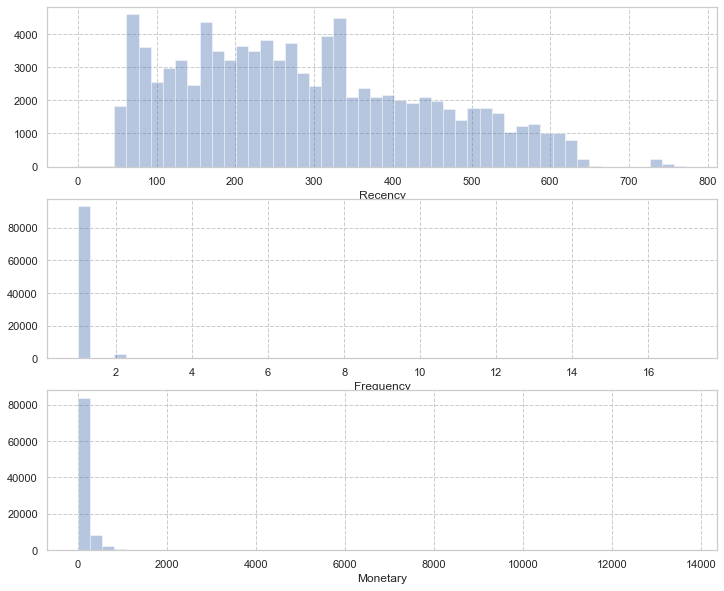

In [68]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df_rfm['Recency'],kde=False)
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df_rfm['Frequency'],kde=False)
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df_rfm['Monetary'],kde=False)
# Show the plot
plt.show()

In [71]:
# Load datasets
order_items = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_order_items_dataset.csv')
orders = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_orders_dataset.csv',
                     parse_dates=['order_purchase_timestamp'])
products = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_products_dataset.csv')
product_translation = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/product_category_name_translation.csv')

In [ ]:
closed_deals.tail(5)

In [72]:
#get some info about dataframes

print(closed_deals.shape)
print(order_items.shape)
print(orders.shape)
print(products.shape)
print(product_translation.shape)

(842, 14)
(112650, 7)
(99441, 8)
(32951, 9)
(71, 2)


In [73]:
# Merge all dataframes
df = pd.merge(closed_deals,order_items,
                how='inner', on='seller_id')
df = pd.merge(df, orders,
                how='inner', on='order_id')
df = pd.merge(df, products,
                how='inner', on='product_id')
df = pd.merge(df, product_translation,
                how='left', on='product_category_name')
df.shape

(5044, 36)

In [74]:
# Sort out orders not devliered to customers
df = df[df['order_status'] == 'delivered']

# Add a 'year-month' column
df['order_purchase_timestamp(y-m)'] = df['order_purchase_timestamp'].dt.to_period('M')

print(df.shape)
df.head(3)

(4984, 37)


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_timestamp(y-m)
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,...,pet_shop,56.0,1538.0,2.0,625.0,23.0,17.0,19.0,pet_shop,2018-06
1,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,...,ferramentas_jardim,25.0,432.0,1.0,2825.0,29.0,29.0,29.0,garden_tools,2018-07
2,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,...,pet_shop,53.0,1494.0,2.0,900.0,26.0,19.0,23.0,pet_shop,2018-06


In [75]:
columns = df.groupby(by='business_segment') \
           .price \
           .sum() \
           .sort_values(ascending=False) \
           .index

monthly_revenue = df.groupby(['order_purchase_timestamp(y-m)', 'business_segment']) \
                              .price \
                              .sum() \
                              .unstack(level=1, fill_value=0)
monthly_revenue = monthly_revenue[columns]
monthly_revenue

business_segment,watches,health_beauty,household_utilities,audio_video_electronics,small_appliances,home_decor,pet,construction_tools_house_garden,car_accessories,home_appliances,...,books,music_instruments,toys,phone_mobile,food_drink,air_conditioning,gifts,handcrafted,games_consoles,party
order_purchase_timestamp(y-m),,,,,,,,,,,,,,,,,,,,,
2018-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2018-02,5935.46,28.00,443.60,20.00,140.00,1042.50,211.96,677.56,178.90,0.00,...,0.00,1447.90,234.69,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2018-03,27439.45,567.50,2233.49,2842.87,12620.00,531.50,377.86,1154.44,347.00,145.97,...,19.90,179.90,238.10,642.00,14.90,0.0,0.00,0.0,0.0,0.00
2018-04,21918.00,6793.63,5008.94,3074.49,12529.90,2857.34,4586.34,2611.66,4266.00,869.98,...,344.45,439.79,923.06,1189.90,223.50,0.0,189.00,0.0,0.0,0.00
2018-05,31286.81,17073.44,10153.85,9813.11,14447.50,6134.17,3316.38,6499.96,3451.86,435.00,...,3023.27,494.86,670.41,152.90,413.80,0.0,0.00,0.0,0.0,0.00
2018-06,11547.88,25298.46,10497.65,10067.49,3909.80,8414.03,6292.87,4591.75,5414.06,2494.49,...,1020.19,973.59,1116.54,1247.59,302.40,282.0,0.00,93.8,0.0,0.00
2018-07,7393.44,20035.20,11568.15,12017.70,1187.20,10980.97,9526.63,8485.62,6637.60,16278.83,...,1554.74,1189.70,1153.53,449.70,1148.49,278.0,482.98,93.8,438.0,0.00
2018-08,10380.04,19128.11,11375.19,11587.78,2840.47,13848.82,16186.79,7986.08,9710.56,6016.90,...,980.34,1113.90,1220.53,599.30,1599.84,2090.0,339.29,688.3,219.0,388.98


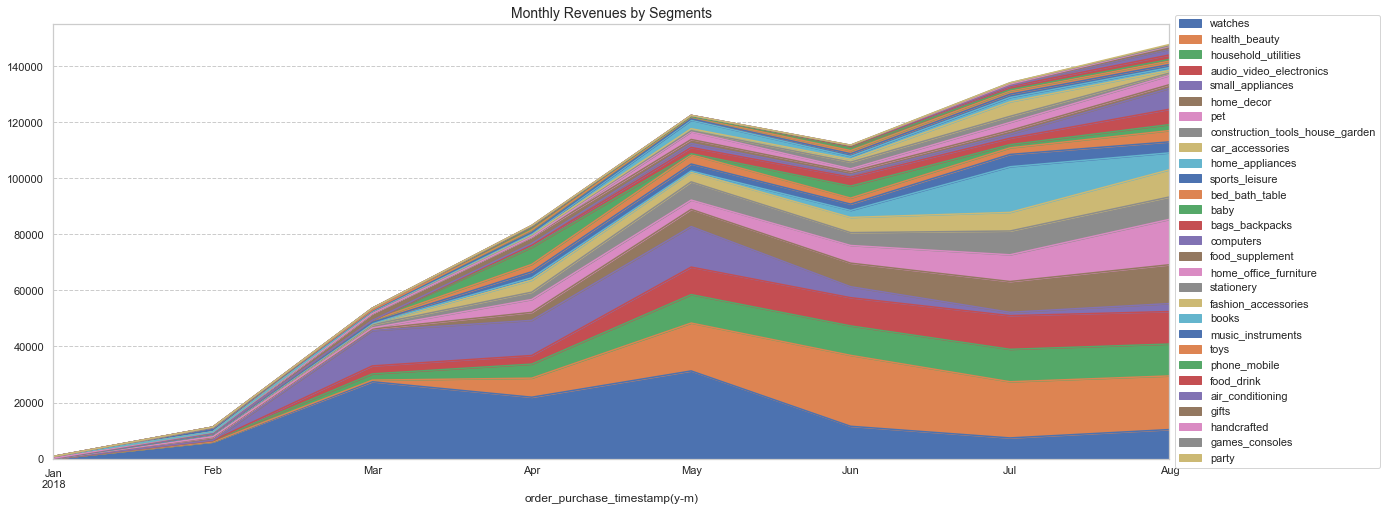

In [76]:
# Plot the monthly revenues by segment
monthly_revenue.plot.area(figsize=(20,8))

plt.title('Monthly Revenues by Segments', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

In [77]:
# Create watches segment dataframe
watches = df[df.business_segment == 'watches']
watches.shape

(586, 37)

In [78]:
# Create monthly revenues by product category
columns = watches.groupby('product_category_name_english') \
              .price \
              .sum() \
              .sort_values(ascending=False) \
              .index

monthly_revenue_category = watches.groupby(['order_purchase_timestamp(y-m)', 'product_category_name_english']) \
                                  .price \
                                  .sum() \
                                  .unstack(level=1, fill_value=0)

monthly_revenue_category = monthly_revenue_category[columns]
monthly_revenue_category

product_category_name_english,watches_gifts,audio,electronics,sports_leisure,cool_stuff,market_place,perfumery
order_purchase_timestamp(y-m),,,,,,,
2018-02,5065.36,590.00,280.10,0.0,0.0,0.0,0.0
2018-03,19106.69,7547.76,240.00,545.0,0.0,0.0,0.0
2018-04,15588.14,5609.89,719.97,0.0,0.0,0.0,0.0
2018-05,29070.81,2216.00,0.00,0.0,0.0,0.0,0.0
2018-06,9727.88,1172.00,0.00,468.0,180.0,0.0,0.0
2018-07,5747.44,876.00,370.00,0.0,180.0,0.0,220.0
2018-08,8077.86,550.00,1464.58,0.0,0.0,287.6,0.0


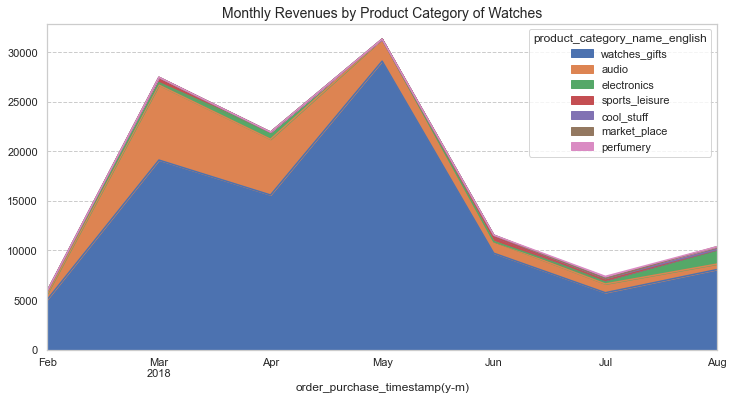

In [79]:
# Plot the monthly revenues by category
monthly_revenue_category.plot.area(figsize=(12,6))
plt.title('Monthly Revenues by Product Category of Watches', fontsize=14);

In [80]:
# Create 'seller - product category' table
cols = watches.groupby('product_category_name_english') \
              .price \
              .sum() \
              .sort_values(ascending=False) \
              .index

watches_seller_revenue = watches.groupby(['seller_id', 'product_category_name_english']) \
                                .price \
                                .sum() \
                                .unstack(level=1, fill_value=0)

watches_seller_revenue = watches_seller_revenue[cols]
watches_seller_revenue['total'] = watches_seller_revenue.sum(axis=1)

watches_seller_revenue

product_category_name_english,watches_gifts,audio,electronics,sports_leisure,cool_stuff,market_place,perfumery,total
seller_id,,,,,,,,
7d13fca15225358621be4086e1eb0964,88919.28,18561.65,3074.65,1013.0,360.0,287.6,220.0,112436.18
bce6a5ecf98e99fd2a8868b15c51f04b,3464.90,0.00,0.00,0.0,0.0,0.0,0.0,3464.90


In [81]:
# Create 'category - seller' table
index = watches.groupby('product_category_name_english') \
               .price \
               .sum() \
               .sort_values() \
               .index

seller_category_revenue = watches.groupby(['seller_id', 'product_category_name_english']) \
                                 .price \
                                 .sum() \
                                 .unstack(level=0, fill_value=0) \
                                 
seller_category_revenue = seller_category_revenue.reindex(index)
seller_category_revenue

seller_id,7d13fca15225358621be4086e1eb0964,bce6a5ecf98e99fd2a8868b15c51f04b
product_category_name_english,,
perfumery,220.00,0.0
market_place,287.60,0.0
cool_stuff,360.00,0.0
sports_leisure,1013.00,0.0
electronics,3074.65,0.0
audio,18561.65,0.0
watches_gifts,88919.28,3464.9


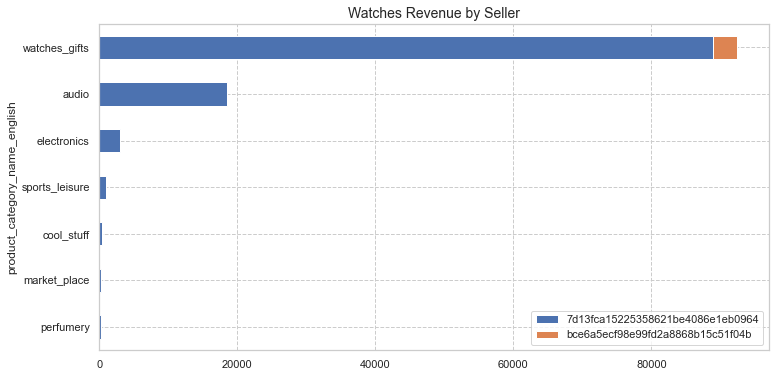

In [82]:
# Plot the above table
seller_category_revenue.plot.barh(stacked=True, figsize=(12,6))

plt.title('Watches Revenue by Seller', fontsize=14)
plt.legend(loc='lower right');

In [83]:
orders = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_orders_dataset.csv')
order_item = pd.read_csv('C:/UTD/BUAN 6341.002 - Applied Machine Learning/Project/olist_order_items_dataset.csv')

In [84]:
orders = orders[['order_id', 'order_purchase_timestamp']]
order_item = order_item[['order_id', 'price']]

In [85]:
orders_items = pd.merge(orders, order_item, on='order_id')
orders_items.head()

,order_id,order_purchase_timestamp,price
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90


In [89]:
from datetime import datetime

df_final = orders_items[['order_purchase_timestamp', 'price']]

df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['order_purchase_timestamp'] = df_final['order_purchase_timestamp'].dt.date
df_final=df_final[(df_final['order_purchase_timestamp'] > datetime.strptime('2017-01-01', '%Y-%m-%d').date()) &  (df_final['order_purchase_timestamp'] < datetime.strptime('2018-09-30', '%Y-%m-%d').date())]

df_final.columns = ['order_purchase_timestamp', 'value']
#df_final = df_final.sort_values('order_purchase_timestamp')
df_final.head(5)

,order_purchase_timestamp,value
0,2017-10-02,29.99
1,2018-07-24,118.70
2,2018-08-08,159.90
3,2017-11-18,45.00
4,2018-02-13,19.90


In [90]:
df_final = df_final[['order_purchase_timestamp', 'value']]

df_final = df_final.groupby(['order_purchase_timestamp']).sum()
df_groupby_copy = df_final

df_groupby_copy['data'] = df_final.index.values
df_groupby_copy_ARIMA = df_groupby_copy
df_groupby_copy.head()

,value,data
order_purchase_timestamp,,
2017-01-05,396.90,2017-01-05
2017-01-06,916.38,2017-01-06
2017-01-07,1351.90,2017-01-07
2017-01-08,709.58,2017-01-08
2017-01-09,673.79,2017-01-09


In [91]:
df_groupby_copy = df_groupby_copy[['value']]
df_groupby_copy.head()

,value
order_purchase_timestamp,
2017-01-05,396.90
2017-01-06,916.38
2017-01-07,1351.90
2017-01-08,709.58
2017-01-09,673.79


In [92]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [93]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(18, 9))
    ax.plot(line1, label=label1, linewidth=2)
    ax.plot(line2, label=label2, linewidth=2)
    ax.set_ylabel('valor', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18)

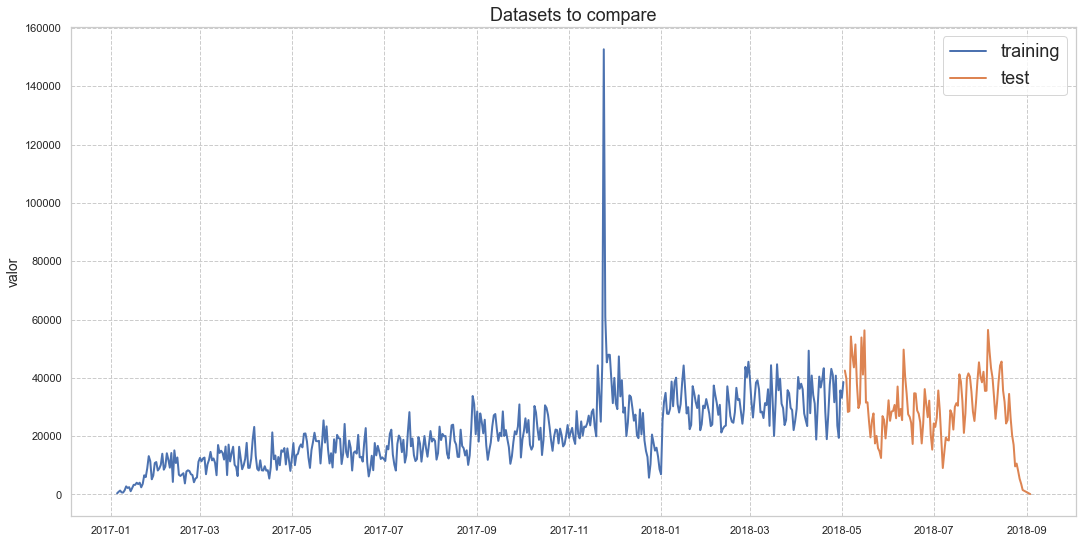

In [96]:
train, test = train_test_split(df_groupby_copy, test_size=0.2)

line_plot(train.value, test.value, 'training', 'test', 'Datasets to compare')

In [97]:
def create_lookback(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [98]:
test.head()

,value
order_purchase_timestamp,
2018-05-03,42497.77
2018-05-04,39730.93
2018-05-05,28306.45
2018-05-06,28565.97
2018-05-07,54167.48


In [100]:
training_set = train.values
training_set = np.array(training_set).reshape((-1,1))
training_set = np.reshape(training_set, (len(training_set), 1))

test_set = test.values
test_set = np.array(test_set).reshape((-1,1))
test_set = np.reshape(test_set, (len(test_set), 1))

#scale datasets
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
test_set = scaler.transform(test_set)

# create datasets which are suitable for time series forecasting
look_back = 1
X_train, Y_train = create_lookback(training_set, look_back)
X_test, Y_test = create_lookback(test_set, look_back)

 # reshape datasets so that they will be ok for the requirements of the LSTM model in Keras
X_train = np.reshape(X_train, (len(X_train), 1, X_train.shape[1]))
X_test = np.reshape(X_test, (len(X_test), 1, X_test.shape[1]))

In [101]:
from keras.models import Sequential 
from keras.layers.recurrent import LSTM
from keras.layers import Dense 


model = Sequential()

model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            264192    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________


In [102]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=16, shuffle=False,
                    validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
31/31 [==============================] - 4s 18ms/step - loss: 0.0034 - val_loss: 0.0052
Epoch 2/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0091 - val_loss: 0.0041
Epoch 3/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0084 - val_loss: 0.0038
Epoch 4/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 5/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 6/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0045 - val_loss: 0.0030
Epoch 7/50
31/31 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 8/50
31/31 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 9/50
31/31 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 10/50
31/31 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 11/50
31/31 

In [104]:
prediction = model.predict(X_test)

In [105]:
prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

prediction2_inverse = np.array(prediction_inverse[:,0][1:])
Y_test2_inverse = np.array(Y_test_inverse[:,0])

### RMSE AND R2 CALCULATED

In [106]:
from sklearn.metrics import mean_squared_error

Y_test2_inverse_without_last = Y_test2_inverse[:-1]
RMSE = (mean_squared_error(Y_test2_inverse_without_last, prediction2_inverse))**0.5
print('Test RMSE: %.3f' % RMSE)
print('R2 Score: ', r2_score(y_test, y_pred))

Test RMSE: 3154.170


In [109]:
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score: 0.8532


In [107]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [108]:
Test_Dates = test.index

trace1 = go.Scatter(x=Test_Dates, y=Y_test2_inverse, name= 'Actual Price',
                   line = dict(color = ('rgb(66, 244, 155)'),width = 2))

trace2 = go.Scatter(x=Test_Dates, y=prediction2_inverse, name= 'Predicted Price',
                   line = dict(color = ('rgb(244, 146, 65)'),width = 2))
data = [trace1, trace2]
layout = dict(title = 'With purchase date information to predict future sales',
             xaxis = dict(title = 'Date'), yaxis = dict(title = 'purchase value'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results_demonstrating1')